Importing Libraries

In [38]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, auc
import matplotlib.pyplot as plt

Load CIFAR-100 dataset

In [39]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

Preprocess the data

In [40]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

Build the neural network

In [41]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='softmax'))

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [42]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Define early stopping

In [43]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

Train the network

In [44]:
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 88ms/step - accuracy: 0.0469 - loss: 4.5206 - val_accuracy: 0.0739 - val_loss: 4.1101
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.1327 - loss: 3.7274 - val_accuracy: 0.1957 - val_loss: 3.3855
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.1830 - loss: 3.3956 - val_accuracy: 0.2290 - val_loss: 3.2407
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 88ms/step - accuracy: 0.2164 - loss: 3.1860 - val_accuracy: 0.1360 - val_loss: 4.3769
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 88ms/step - accuracy: 0.2416 - loss: 3.0424 - val_accuracy: 0.2952 - val_loss: 2.7801
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.2637 - loss: 2.9090 - val_accuracy: 0.2853 - val_loss: 2.8386
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.2754 - loss: 2.8306 - val_accuracy: 0.3143 - val_loss: 2.7199
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.2950 - loss: 2.7292 - 

Evaluate the model

In [45]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3725 - loss: 2.5078
Test Accuracy: 0.3675999939441681


Predict probabilities for test set

In [46]:
y_pred_proba = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


Calculate ROC curve and AUC for each class

In [47]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(100):  # Assuming 100 classes in CIFAR-100
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

Plot ROC curve

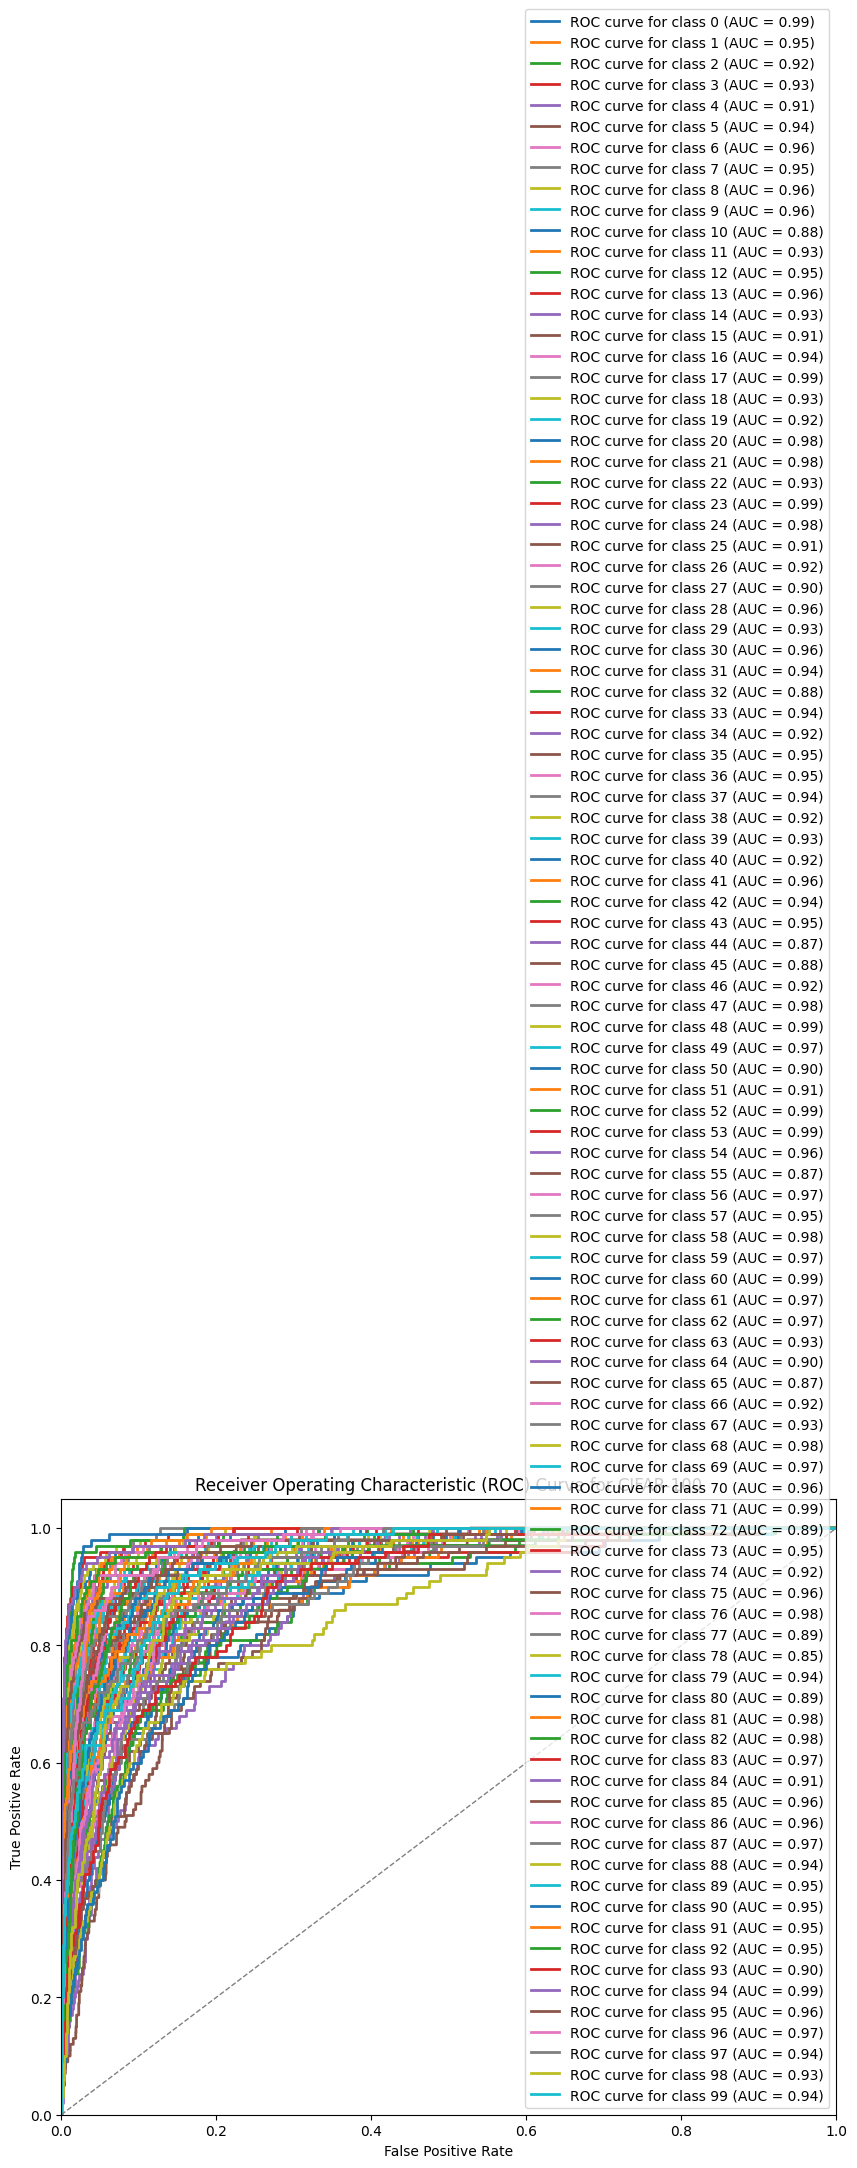

In [52]:
plt.figure(figsize=(10, 8))
for i in range(100):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve for class %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for CIFAR-100')
plt.legend(loc='lower right')
plt.show()

Calculate confusion matrix

In [19]:
y_pred_classes = np.argmax(y_pred_proba, axis=1)
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

Print confusion matrix

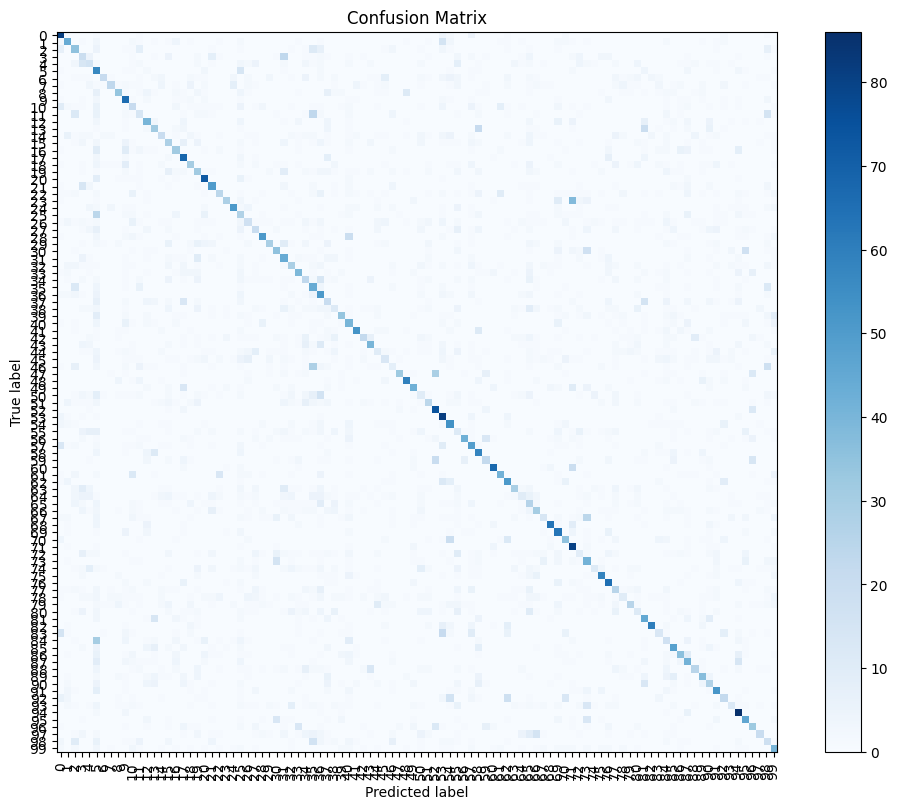

In [20]:
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(100)
plt.xticks(tick_marks, tick_marks, rotation=90)
plt.yticks(tick_marks, tick_marks)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Print classification report

In [21]:
print(classification_report(np.argmax(y_test, axis=1), y_pred_classes))

              precision    recall  f1-score   support

           0       0.47      0.81      0.60       100
           1       0.45      0.44      0.45       100
           2       0.28      0.35      0.31       100
           3       0.14      0.19      0.16       100
           4       0.19      0.16      0.17       100
           5       0.16      0.57      0.24       100
           6       0.70      0.21      0.32       100
           7       0.64      0.23      0.34       100
           8       0.57      0.34      0.42       100
           9       0.39      0.66      0.49       100
          10       0.21      0.21      0.21       100
          11       0.18      0.14      0.16       100
          12       0.37      0.40      0.39       100
          13       0.33      0.31      0.32       100
          14       0.36      0.20      0.26       100
          15       0.25      0.28      0.27       100
          16       0.38      0.31      0.34       100
          17       0.41    